### Machine Learning: Regression - Appliances Energy Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

#Libraries for bulding models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Importing dataset to be used
energydata = pd.read_csv('datasets/energydata.csv')
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
#droping unwanted features
model_data = energydata.drop(columns=['date', 'lights'])

In [3]:
#normalizing the model_data using MinMaxScaler()
scaler = MinMaxScaler()

model_data_norm = pd.DataFrame(scaler.fit_transform(model_data), columns=model_data.columns)
features = model_data_norm.drop(columns=['Appliances'])
target = model_data_norm['Appliances']

#splitting the dataset into 70:30 with train test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

#defining the model to be used
linear_regre_model = LinearRegression()

#fitting the training dataset to linear regression model
linear_regre_model.fit(x_train, y_train)

#Obtaining predictions using the test dataset
predicted = linear_regre_model.predict(x_test)

##### Finding the coefficients, intercepts and predictions of the trained model

In [4]:
#coefficients of the model
print('\nCoefficient of model :', linear_regre_model.coef_)

#intercept of the model
print('\nIntercept of model :', linear_regre_model.intercept_)

#priting the predictions
print('\nAppliances Energy Prediction :', predicted)


Coefficient of model : [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]

Intercept of model : 0.15290295882253055

Appliances Energy Prediction : [0.03322207 0.24411599 0.03400024 ... 0.06844707 0.10032325 0.05722198]


###### Evaluation metrics

In [5]:
mae = mean_absolute_error(y_test, predicted)
print('\nMAE :', round(mae, 2))


MAE : 0.05


In [7]:
#R2 score
r2_score = r2_score(y_test, predicted)
round(r2_score, 2)

0.15

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('\nRMSE :', round(rmse, 3))


RMSE : 0.088


In [9]:
rmse = mean_squared_error(y_test, predicted)
print('\nMSE :', round(rmse, 3))


MSE : 0.008


In [10]:
rss = np.sum(np.square(y_test - predicted))
#rss = np.sum(np.square(y_test - predicted))
print('\nRSS :', round(rss, 2))


RSS : 45.35


#### Training Ridge and Lasso regression

In [13]:
#Train rdge and obtain its RMSE
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)

predicted = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('\nRMSE for Ridge :', round(rmse, 3))


RMSE for Ridge : 0.088


In [12]:
#Train lasso and obtain its coefficients
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)
lasso_reg.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [14]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

predicted = lasso_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('\nRMSE for Lasso :', round(rmse, 3))


RMSE for Lasso : 0.094


### Getting the coefficients of the trained models

In [15]:
#comparing the effect of regularization
def get_weight_df(linear_regre_model, feat, col_name):
    #this function returns the weight of every features
    weights = pd.Series(linear_regre_model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_regre_model_weights = get_weight_df(linear_regre_model, x_train, 'Linear_regre_Model_Weight')
ridge_weights_df = get_weight_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weight_df(lasso_reg, x_train, 'Lasso_Weight')

combine_weights = pd.merge(linear_regre_model_weights, ridge_weights_df, on='Features')
combine_weights =pd.merge(combine_weights, lasso_weights_df, on='Features')
combine_weights

,Features,Linear_regre_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [16]:
#getting where linear regression is maximum
linear_regre_model.coef_.max()

0.5535465998386386

In [17]:
#getting where linear regression is minimum
linear_regre_model.coef_.min()

-0.45669794833849997

#### Back to question 12, I do not really understand the question but I attempt it anyway

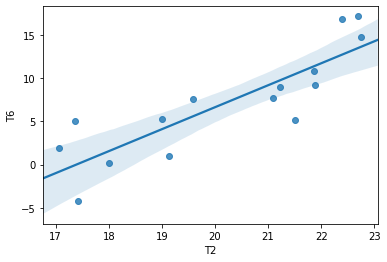

In [19]:
import seaborn as sns

#select a sample of the dataset
df = model_data[['T2', 'T6']].sample(15, random_state=2)
#regression plot
sns.regplot(x="T2", y="T6", data=df)

In [20]:
features = model_data[['T6']]
target = model_data['T6']

lr = LinearRegression()
#splitting the dataset into 70:30
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

lr.fit(x_train,y_train)
predicted = lr.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('\nRMSE :', round(rmse, 2))


RMSE : 0.0


#### Thanks for reading through this. I have noticed a very good significant improvement in my learning from the last test. I look forward to new challenges in the next phase.